# ZiXun Fang

## Research question/interests

### Research Question

1. Is there a significant difference in users' and gaming medias’ positive reviews for free, low-paid, medium-paid, and high-paid games?

2. Is there a significant difference in gamers and gaming media ratings across different game categories?

3. Is there a significant difference in gamers and gaming media ratings between indie games and non-indie games?

My research question aims to find the relationship between game pricing strategies and positive reviews. Positive reviews will focus on positive reviews, percentaul on steams and Metacritic scores. Despite the controversy surrounding gaming media ratings (IGN), I think they are still more objective than personal ratings, which often include personal bias and hatred of other games. By examining this relationship, we can see if players have a higher tolerance for free or low-paid games, This might be one of the reasons why popular game publishers are willing to convert paid games into free games.

### Interests

Nowadays, the video game industry is highly competitive, with outstanding game quality and different pricing strategies. Free and low-paid games prioritize gamers' accessibility and expand awareness, while high-paid games usually rely on their IP values and excellent game qualities. In the past few years, some popular games (CSGO, PUBG, etc.) have changed from paid to free. Thus, as a finance student, it is interesting to investigate how pricing models (free, low, medium and high) affect users’ and gaming media reviews. It could inform data-driven decision-making for game monetization and flexible pricing strategies.

In [1]:
# Run this cell to ensure that altair plots show up without having
# the notebook be really large.
# We will talk more about what these lines do later in the course

import os
import altair as alt
import pandas as pd
from toolz.curried import pipe
import numpy as np

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## EDA

In [9]:
path = '../../data/processed/cleaned_games.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(58041, 21)


,Unnamed: 0,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
2,3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
3,4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
4,7,2719710,Manor Madness,['Apericot Studio'],['Apericot Studio'],"['Single-player', 'Steam Achievements', 'HDR a...","['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,5,"['windows', 'mac', 'linux']",...,[],0,0,0,0.0,No user reviews,0.0,0,True,0.00


In [10]:
filtered_columns = ['name', 'developers','categories','genres','release_date', 'total_reviews', 'total_positive', 
                    'total_negative', 'review_score', 'review_score_desc', 'positive_percentual', 
                    'metacritic', 'is_free', 'price_initial (USD)']

In [11]:
games_filtered = data[filtered_columns]
games_filtered = games_filtered[games_filtered['total_reviews'] >= 50]
games_filtered.head()

,name,developers,categories,genres,release_date,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
24,Night Raider,['Tsukuyomi'],"['Single-player', 'Family Sharing']","['Adventure', 'Indie']",2024-01-26,176,157,19,8.0,Very Positive,89.2,0,False,5.99
47,Tobla - Divine Path,['Nementic Games'],"['Single-player', 'Steam Achievements', 'Full ...","['Adventure', 'Casual', 'Indie']",2024-03-29,92,86,6,8.0,Very Positive,93.5,0,False,7.99
52,The Rogue Prince of Persia,['Evil Empire'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Early Access']",2024-05-27,567,490,77,8.0,Very Positive,86.4,0,False,19.99
56,Merry XMerge,['PiHoEntertainment'],"['Single-player', 'Steam Cloud', 'Remote Play ...","['Casual', 'Indie', 'Strategy']",2023-12-25,522,510,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99
63,I'm counting to 6...,['EMIKA_GAMES'],"['Single-player', 'Steam Achievements', 'Parti...","['Adventure', 'Indie', 'Simulation']",2024-01-26,157,129,28,8.0,Very Positive,82.2,0,False,6.99


In [12]:
games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 24 to 58039
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 11568 non-null  object 
 1   developers           11568 non-null  object 
 2   categories           11568 non-null  object 
 3   genres               11568 non-null  object 
 4   release_date         11568 non-null  object 
 5   total_reviews        11568 non-null  int64  
 6   total_positive       11568 non-null  int64  
 7   total_negative       11568 non-null  int64  
 8   review_score         11568 non-null  float64
 9   review_score_desc    11568 non-null  object 
 10  positive_percentual  11568 non-null  float64
 11  metacritic           11568 non-null  int64  
 12  is_free              11568 non-null  bool   
 13  price_initial (USD)  11568 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 1.2+ MB


In [13]:
categorical_cardinality = games_filtered.select_dtypes(include=['object']).nunique()
print(categorical_cardinality)

name                 11568
developers            7959
categories            2686
genres                 719
release_date          3476
review_score_desc        7
dtype: int64


In [14]:
int_cardinality = data.select_dtypes(include=['int64', 'float64']).nunique()
print(int_cardinality)

Unnamed: 0             58041
steam_appid            58041
required_age              69
n_achievements           343
total_reviews           2770
total_positive          2598
total_negative          1190
review_score              10
positive_percentual      805
metacritic                69
price_initial (USD)      247
dtype: int64


In [15]:
games_filtered.describe()

,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,price_initial (USD)
count,1.156800e+04,1.156800e+04,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000
mean,2.502677e+03,2.201657e+03,301.019450,7.025847,80.299732,14.315698,14.162542
std,2.072317e+04,1.830271e+04,2897.100148,1.382725,14.779909,29.510360,11.968562
min,5.000000e+01,3.000000e+00,0.000000,1.000000,4.300000,0.000000,0.000000
25%,8.800000e+01,6.800000e+01,15.000000,6.000000,72.800000,0.000000,4.990000
50%,1.920000e+02,1.510000e+02,35.000000,8.000000,83.700000,0.000000,9.990000
75%,6.320000e+02,5.220000e+02,98.000000,8.000000,91.500000,0.000000,19.990000
max,1.279700e+06,1.107275e+06,172425.000000,9.000000,100.000000,97.000000,269.990000


In [16]:
bins = [0, 1, 10, 30, 50, float('inf')]
labels = ['Free', 'Low', 'Medium', 'High', 'Premium']

games_filtered['price_group'] = pd.cut(games_filtered['price_initial (USD)'], bins = bins, labels = labels, right = False)

print(games_filtered[['price_initial (USD)', 'price_group']])

       price_initial (USD) price_group
24                    5.99         Low
47                    7.99         Low
52                   19.99      Medium
56                    0.99        Free
63                    6.99         Low
...                    ...         ...
58026                 2.99         Low
58028                16.99      Medium
58032                14.99      Medium
58038                14.99      Medium
58039                 5.99         Low

[11568 rows x 2 columns]


In [18]:
# Number of Games in Each Price Zone
price_distribution = games_filtered['price_group'].value_counts().sort_index()
print(price_distribution)

# Check outliers
print("\nLowest Game Price", games_filtered['price_initial (USD)'].min())
print("Highest Game Price", games_filtered['price_initial (USD)'].max())

price_group
Free        892
Low        4901
Medium     5059
High        542
Premium     174
Name: count, dtype: int64

Lowest Game Price 0.0
Highest Game Price 269.99


In [23]:
# Check Average Positive Percentual and Metacritic in each price zone

price_zone_analysis = games_filtered.groupby('price_group').agg(
    avg_positive_percentual=('positive_percentual', 'mean'),
    avg_metacritic=('metacritic', lambda x: x[x != 0].mean())
).reset_index()

print("Average Reviews in Each Price Zone\n", price_zone_analysis)

Average Reviews in Each Price Zone
   price_group  avg_positive_percentual  avg_metacritic
0        Free                75.940583       72.777778
1         Low                80.184269       70.547926
2      Medium                81.245839       74.833065
3        High                80.606458       78.160494
4     Premium                77.435632       80.867925


C:\Users\Surface\AppData\Local\Temp\ipykernel_71952\346900811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_zone_analysis = games_filtered.groupby('price_group').agg(


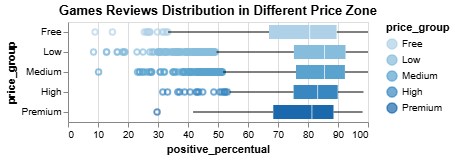

In [26]:
game_reviews_distritbution = alt.Chart(games_filtered).mark_boxplot().encode(
    x='positive_percentual',
    y='price_group',
    color='price_group'
).properties(
    title='Games Reviews Distribution in Different Price Zone'
)

game_reviews_distritbution

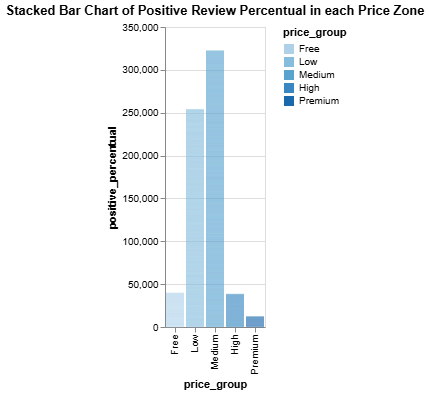

In [13]:
alt.Chart(games_filtered).mark_bar().encode(
    alt.X('price_group'),
    alt.Y('positive_percentual'),
    alt.Color('price_group')
).properties(
    title='Stacked Bar Chart of Positive Review Percentual in each Price Zone'
)

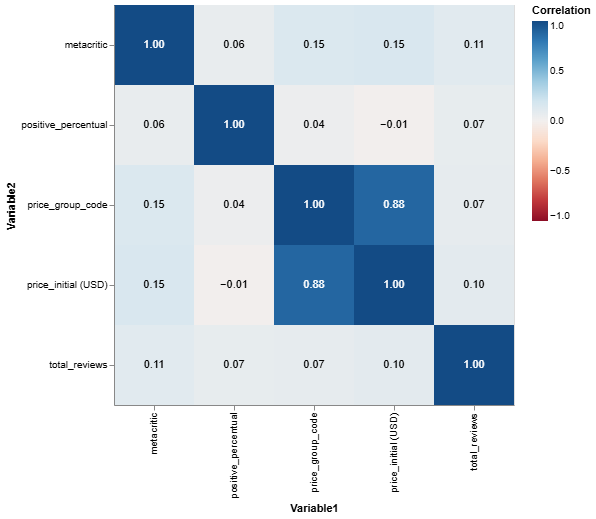

In [15]:
games_filtered['price_group_code'] = pd.Categorical(games_filtered['price_group']).codes

games_filtered['metacritic_norm'] = games_filtered['metacritic'] / 100


numeric_vars = ['price_initial (USD)', 'positive_percentual', 'metacritic', 'total_reviews', 'price_group_code']
corr_matrix = games_filtered[numeric_vars].corr()

corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']

correlation_heatmap = alt.Chart(corr_df).mark_rect().encode(
    x='Variable1:N',
    y='Variable2:N',
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue', domain=(-1, 1))),
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    width=400,
    height=400
)

heatmap_text = correlation_heatmap.mark_text().encode(
    text=alt.Text('Correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Correlation > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

final_chart = correlation_heatmap + heatmap_text
final_chart

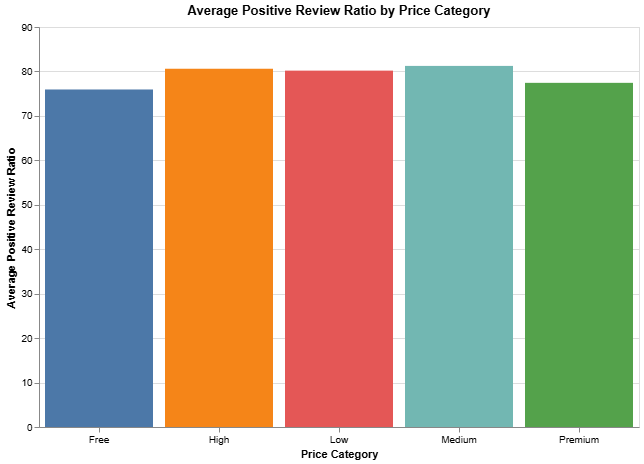

In [20]:
alt.Chart(games_filtered).mark_bar().encode(
    x=alt.X('price_group:N', title = 'Price Category',axis=alt.Axis(labelAngle=0)),
    y=alt.Y('mean(positive_percentual):Q', title = 'Average Positive Review Ratio'),
    color=alt.Color('price_group:N', legend=None),
    tooltip=['price_group','mean(positive_percentual)']
).properties(
    width=600,
    height=400,
    title='Average Positive Review Ratio by Price Category'
)

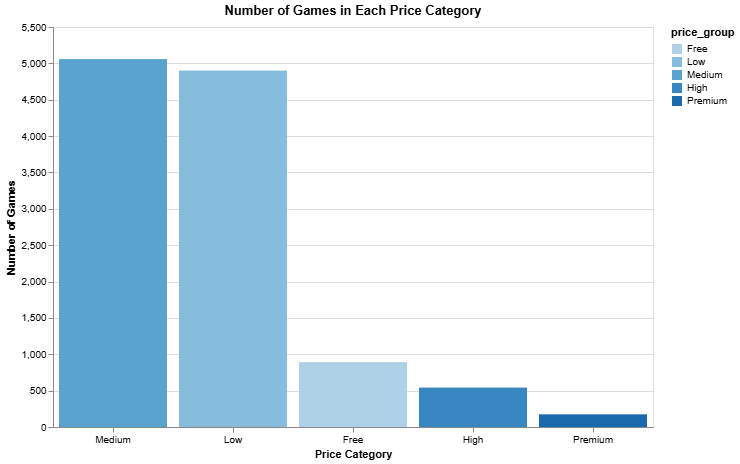

In [22]:
alt.Chart(games_filtered).mark_bar().encode(
    alt.X('price_group:N', title = 'Price Category', sort = '-y', axis=alt.Axis(labelAngle=0)),
    alt.Y('count():Q', title = 'Number of Games'),
    alt.Color('price_group')
).properties(
    width=600,
    height=400,
    title='Number of Games in Each Price Category'
)